In [ ]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
!pip install scikit-learn
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshitha1231234","key":"9df3558ae0357b907d778b2b2b7af135"}'}

In [ ]:
import os

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"]="/content"

In [ ]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research


Dataset URL: https://www.kaggle.com/datasets/sid321axn/covid-cxr-image-dataset-research
License(s): CC0-1.0
 99% 567M/572M [00:10<00:00, 82.6MB/s]
100% 572M/572M [00:10<00:00, 56.2MB/s]


In [ ]:
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [ ]:
for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE/"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


there are 3 directories and 0 images in '/content/COVID_IEEE/'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.


In [ ]:
data_dir = pathlib.Path("/content/COVID_IEEE/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [ ]:
def view_image(target_dir,target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img,cmap="gray")
  plt.title(target_class)
  plt.axis("off")
  print(f"image shape: {img.shape}")

  return img

['person1186_virus_2022.jpeg']
image shape: (640, 1072)


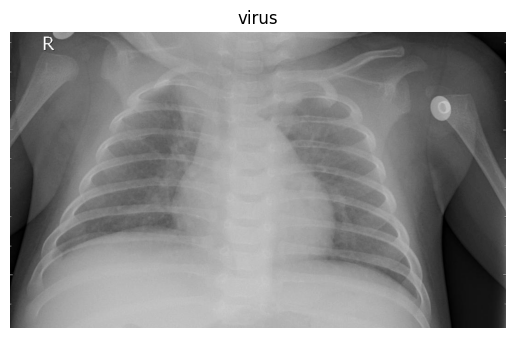

In [ ]:
img = view_image("/content/COVID_IEEE/","virus")


['IM-0386-0001.jpeg']
image shape: (1302, 1550)


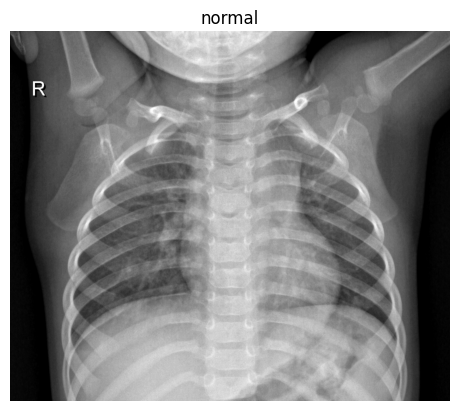

In [ ]:
img=view_image("/content/COVID_IEEE/","normal")

['covid1900174.png']
image shape: (480, 640, 3)


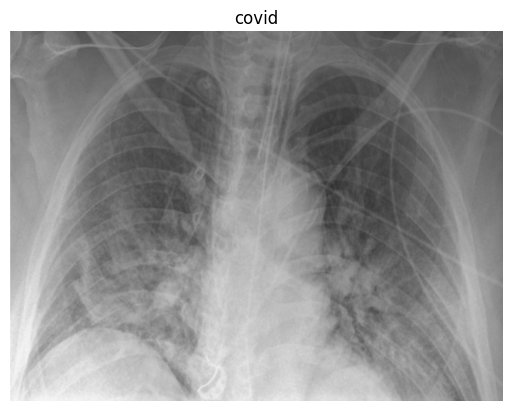

In [ ]:
img=view_image("/content/COVID_IEEE/","covid")

In [ ]:
 data=[]
 labels=[]
 covid=os.listdir("/content/COVID_IEEE/covid/")
 for a in covid:
  image=cv2.imread("/content/COVID_IEEE/covid/"+a)
  image=cv2.resize(image,(224,224))
  data.append(image)
  labels.append(0)

In [ ]:
normal=os.listdir("/content/COVID_IEEE/normal")
for a in normal:
  image=cv2.imread("/content/COVID_IEEE/normal/"+a)
  image=cv2.resize(image,(224,224))
  data.append(image)
  labels.append(1)

In [ ]:
virus=os.listdir("/content/COVID_IEEE/virus")
for a in virus:
  image=cv2.imread("/content/COVID_IEEE/virus/"+a)
  image=cv2.resize(image,(224,224))
  data.append(image)
  labels.append(2)

In [ ]:
data=np.array(data)/255.0
img_labels=np.array(labels)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data,img_labels,test_size=0.20,random_state=42)

In [ ]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=3)

y_test=tf.keras.utils.to_categorical(y_test,num_classes=3)

In [ ]:
model=Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=32,padding="same",kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(filters=32,padding="same",kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,padding="same",kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(filters=64,padding="same",kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D((2,2)))
#model number 1
model.add(Conv2D(filters=128,padding="same",kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(filters=128,padding="same",kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D((2,2)))
model.add(MaxPool2D((2,2)))
#fully connected layer

model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=3,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [ ]:
model.fit(X_train,y_train,validation_split=0.3,epochs=15,batch_size=32)


Epoch 1/15
32/32 [==============================] - 468s 15s/step - loss: 0.7573 - accuracy: 0.6363 - val_loss: 0.4959 - val_accuracy: 0.7945
Epoch 2/15
32/32 [==============================] - 460s 14s/step - loss: 0.4191 - accuracy: 0.8588 - val_loss: 0.3276 - val_accuracy: 0.8858
Epoch 3/15
32/32 [==============================] - 456s 14s/step - loss: 0.2443 - accuracy: 0.9137 - val_loss: 0.2349 - val_accuracy: 0.9292
Epoch 4/15
32/32 [==============================] - 421s 13s/step - loss: 0.1745 - accuracy: 0.9314 - val_loss: 0.2140 - val_accuracy: 0.9269
Epoch 5/15
32/32 [==============================] - 453s 14s/step - loss: 0.1087 - accuracy: 0.9647 - val_loss: 0.3533 - val_accuracy: 0.9110
Epoch 6/15
32/32 [==============================] - 454s 14s/step - loss: 0.1243 - accuracy: 0.9608 - val_loss: 0.1993 - val_accuracy: 0.9247
Epoch 7/15
32/32 [==============================] - 453s 14s/step - loss: 0.0753 - accuracy: 0.9755 - val_loss: 0.2130 - val_accuracy: 0.9406
Epoch 

Text(0.5, 1.0, 'Training and validation accuracy')

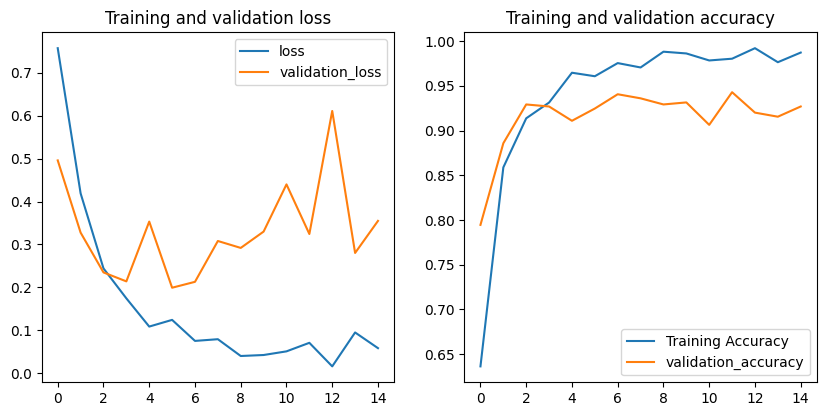

In [ ]:
loss=pd.DataFrame(model.history.history)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(loss["loss"],label="loss")
plt.plot(loss["val_loss"],label="validation_loss")
plt.legend()
plt.title("Training and validation loss")
plt.subplot(2,2,2)
plt.plot(loss["accuracy"],label="Training Accuracy")
plt.plot(loss["val_accuracy"],label="validation_accuracy")
plt.legend()
plt.title("Training and validation accuracy")

In [ ]:
predictions=model.predict(X_test)
y_pred=np.argmax(predictions,axis=1)
y_test_new=np.argmax(y_test,axis=1)

12/12 [==============================] - 43s 4s/step


In [ ]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       108
           1       0.97      0.87      0.92       129
           2       0.93      0.97      0.95       128

    accuracy                           0.94       365
   macro avg       0.94      0.95      0.94       365
weighted avg       0.94      0.94      0.94       365



In [ ]:
pd.DataFrame(confusion_matrix(y_test_new,y_pred),columns=("covid","normal","virus"),index=("covid","normal","virus"))

,covid,normal,virus
covid,108,0,0
normal,8,112,9
virus,1,3,124
